## Fast.AI v3

### Lesson 2: Further into Image Classifiers
## Originally taught by Jeremy Howard
## Moderated by John Chamblee

### Tuesday's 3-5:15 pm
### Building 4, Room 247

### What we went over last week:

* Setting up the Colab environment
* Making a simple image classifer for a premade set of data
* Learning rates

### What we will go over this week:
* Collection of image data
* What putting a model into production is like
* Things that can go wrong
* Importance of Regularization and Validation Sets

# Overall Schedule:

|  | Tuesday 4-5:15pm | Friday  4-5:30pm |
|:------:|:-------------------------------------------:|:--------------------------------------------------------------------------:|
| **Week 1** | Introduction | Introduction |
| **Week 2** | **Custom computer vision tasks** | State of the art in Computer Vision |
| **Week 3** | Introduction to Tabular modeling and pandas | Pandas workshop and feature engineering |
| **Week 4** | Tabular and Image Regression | Feature importance and advanced feature  engineering |
| **Week 5** | Natural Language Processing | State of the art in NLP |
| **Week 6** | Segmentation and Kaggle | Audio |
| **Week 7** | Computer vision from scratch | NLP from scratch |
| **Week 8** | Callbacks | Optimizers |
| **Week 9** | Generative Adversarial Networks | Research time / presentations |
| **Week 10** | Putting models into production | Putting models into production |

## Lesson 1 Revisited

# Using your Google Drive!



The paths in this lesson don't use the Google Drive, however, if you do want to use the Google Drive, you can replace `data/bears` with `drive/My Drive/bears`.

Note that content stored in `data` will be deleted whenever you close the notebook.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [0]:
!pip install fastai --upgrade

In [0]:
from fastai import *
from fastai.vision import *

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download image URLs into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload URL file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [0]:
folder = 'black'
file = 'urls_black.txt'

In [0]:
folder = 'teddys'
file = 'urls_teddys.txt'

In [0]:
folder = 'grizzly'
file = 'urls_grizzly.txt'

You will need to run this line once per each category.

In [0]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('data/bears/urls_teddy.txt'),
 PosixPath('data/bears/black'),
 PosixPath('data/bears/urls_grizzly.txt'),
 PosixPath('data/bears/urls_black.txt')]

Now, upload your urls files. You just need to press 'Upload' in your working directory (`data/bears`), select your url files and confirm the upload.

## Download images

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [0]:
classes = ['teddys','grizzly','black']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
# If you have problems download, try adding `max_workers=0` to see what is going wrong:
# download_images(path/file, dest, max_pics=200, max_workers=0)

Then we can remove any images that can't be opened:

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
# If you have a pre-cleaned dataset with a .csv for labels, then run this instead
# np.random.seed(42)
# data = ImageDataBunch.from_csv(".", folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [16]:
data.classes

['black', 'grizzly', 'teddys']

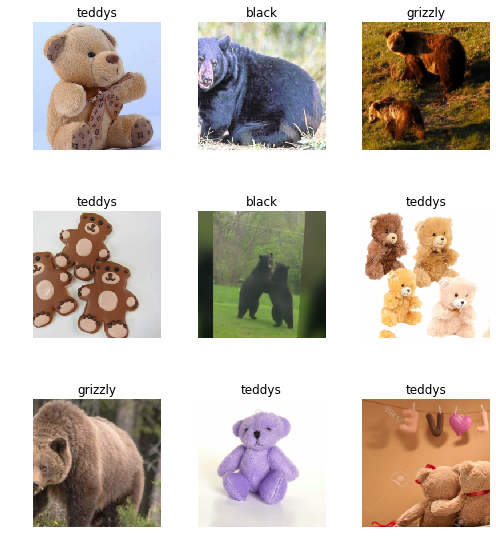

In [19]:
data.show_batch(rows=3, figsize=(7,8))

In [20]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 222, 55)

## Train model

In [21]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 119540077.22it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.957604,0.199212,0.045045
2,0.556265,0.093994,0.036036
3,0.376028,0.082099,0.036036
4,0.273781,0.076548,0.027027


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.046916,0.072489,0.027027
2,0.041749,0.070343,0.027027


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

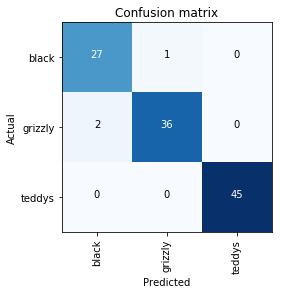

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.plot_top_losses()

## Using your model for inference and brief deployment overview

First thing first, let's export the content of our `Learner` object for production:

In [0]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [0]:
defaults.device = torch.device('cpu')

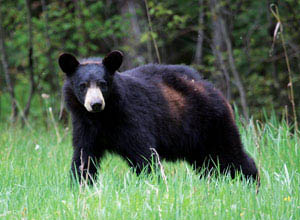

In [0]:
img = open_image(path/'black'/'00000021.jpg')
img

We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category black

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(1, max_lr=0.5)

Total time: 00:13
epoch  train_loss  valid_loss  error_rate       
1      12.220007   1144188288.000000  0.765957    (00:13)



### Learning rate (LR) too low

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [0]:
learn.fit_one_cycle(5, max_lr=1e-5)

Total time: 01:07
epoch  train_loss  valid_loss  error_rate
1      1.349151    1.062807    0.609929    (00:13)
2      1.373262    1.045115    0.546099    (00:13)
3      1.346169    1.006288    0.468085    (00:13)
4      1.334486    0.978713    0.453901    (00:13)
5      1.320978    0.978108    0.446809    (00:13)



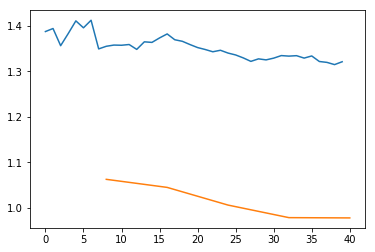

In [0]:
learn.recorder.plot_losses()

As well as taking a really long time, it'll get too many looks at each image through too many epoch to obtain the desired error rate, so it may overfit.

### Too few epochs

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate, pretrained=False)

In [0]:
learn.fit_one_cycle(1)

Total time: 00:14
epoch  train_loss  valid_loss  error_rate
1      0.602823    0.119616    0.049645    (00:14)



### Too many epochs

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [0]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

Total time: 06:39
epoch  train_loss  valid_loss  error_rate
1      1.513021    1.041628    0.507326    (00:13)
2      1.290093    0.994758    0.443223    (00:09)
3      1.185764    0.936145    0.410256    (00:09)
4      1.117229    0.838402    0.322344    (00:09)
5      1.022635    0.734872    0.252747    (00:09)
6      0.951374    0.627288    0.192308    (00:10)
7      0.916111    0.558621    0.184982    (00:09)
8      0.839068    0.503755    0.177656    (00:09)
9      0.749610    0.433475    0.144689    (00:09)
10     0.678583    0.367560    0.124542    (00:09)
11     0.615280    0.327029    0.100733    (00:10)
12     0.558776    0.298989    0.095238    (00:09)
13     0.518109    0.266998    0.084249    (00:09)
14     0.476290    0.257858    0.084249    (00:09)
15     0.436865    0.227299    0.067766    (00:09)
16     0.457189    0.236593    0.078755    (00:10)
17     0.420905    0.240185    0.080586    (00:10)
18     0.395686    0.255465    0.082418    (00:09)
19     0.373232    0.2

# For the next part (Linear Regression/SGD) please watch Jeremy's Lecture

https://github.com/hiromis/notes/blob/master/Lesson2.md

https://course.fast.ai/videos/?lesson=2

~53 minutes into the 2nd lecture


# New AIRG links

If you miss any lessons, they'll be uploaded to our new YouTube channel: [UWF AI Research Group ](https://www.youtube.com/channel/UCG-N0pXCCsjg9hVkgqGFdnQ)

For more updates on lessons, join our Slack group: [FastAI Slack](https://join.slack.com/t/uwffastai2019/shared_invite/enQtNzMwODUxODA2NjkyLWY2YjYwZjMxN2U4Yzc2YTQ3ZjBjYzJkZGYwNWI4MjI5MTBhYzg2MTkwMDk2MTVmYzQ2OWViZWNhYjVhYWUyNzA)